# MNIST Classifier

### Load modules

In [5]:
import tensorflow as tf
import numpy as np
import argparse
import sys

from tensorflow.examples.tutorials.mnist import input_data
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook

%matplotlib inline

### Load data

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Plot number

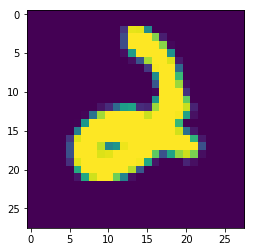

In [3]:
n_train = np.shape(x_train)[0]
idx = np.random.randint(n_train)
vector = x_train[idx]
img = np.reshape(vector, (28, 28))

plt.imshow(img)

### MLP architecture

In [18]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

with tf.device("/cpu:0"):
    
    with tf.name_scope("XW_b"):
        W = tf.Variable(tf.zeros([784, 10]))
        b = tf.Variable(tf.zeros([10]))
        preds = tf.matmul(x, W) + b

    with tf.name_scope(""):
        cross_entropy = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(
                labels=y, 
                logits=preds
            )
        )
        
    with tf.name_scope("optimization"):
        train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
        
    with tf.name_scope("accuracy"):
        correct_prediction = tf.equal(tf.argmax(preds, axis=1), tf.argmax(y, axis=1)) 
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [23]:
# Train
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

for _ in tqdm_notebook(range(1000)):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y: batch_ys})

In [24]:
# Test
out = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})
print(out)

0.9184
